Resultados para o pré-processamento das imagens de entrada. 
Os resultados parciais mostrados são de dois exemplos de imagens de assinaturas manuscritas digitalizada que passaram pelo processo de transformação de RGB para binario e pelo algoritmo de thinning para esqueletização dessas assinaturas.


In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Primeiramente, implementou-se a função 'RGBtoBinary', que tem como objetivo transformar a imagem RGB recebida em uma imagem binária. Como sub-rotina, utilizou-se uma nova função 'RGBtoGrayscale', que transforma uma imagem RGB em tons de cinza. Depois, utilizou-se uma técnica simples de segmentação que transforma todos os pixels com valor maior do que 75% do pixel de maior magnitude em 0 (o que representa o fundo da imagem) e o restante em 1 (que representa a informação relevante, isto é, a assinatura).


In [2]:
#Funcao para transformar imagem RGB em GRAYSCALE
def RGBtoGrayscale(RGB):
    # divide o canal RGB em tres arrays distintos
    R = RGB[:,:,0].astype(np.float32)
    G = RGB[:,:,1].astype(np.float32)
    B = RGB[:,:,2].astype(np.float32)

    gray = 0.2989 * R + 0.5870 * G + 0.1140 * B # Equação que converte RGB em grayscale
    return ((gray/np.max(gray)) * 255).astype(np.uint8); #retorna a imagem normalizada


In [3]:
#Funcao para transformar imagem RGB em uma imagem binaria,
#levando em consideracao os 75% pixels de maior magnitude como sendo o fundo da imagem e o restante a assinatura.
def RGBtoBinary(InputImg):

    GrayImg = RGBtoGrayscale(InputImg) 
    
    BinImg = np.less(GrayImg, 0.75 * np.max(GrayImg)) * 1 
    
    return BinImg.astype(np.uint8)


Exemplo de execução das funções de conversão de imagens de entrada RGB para imagens binárias. Utilizou-se duas imagens de assinaturas como entrada de teste e a biblioteca matplotlib para demonstrar os resultados: 

(-0.5, 647.5, 149.5, -0.5)

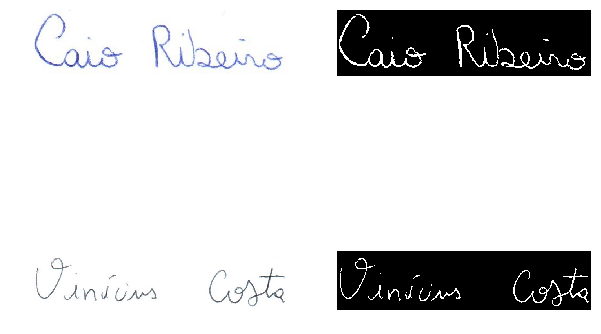

In [4]:
InputImg1 = imageio.imread("ass2.jpg")
InputImg2 = imageio.imread("ass6.jpg")

BinImage1 = RGBtoBinary(InputImg1)
BinImage2 = RGBtoBinary(InputImg2)

plt.figure(figsize=(10,8))
plt.subplot(221)
plt.imshow(InputImg1)
plt.axis('off')

plt.subplot(222)
plt.imshow(BinImage1, cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.imshow(InputImg2)
plt.axis('off')

plt.subplot(224)
plt.imshow(BinImage2, cmap='gray')
plt.axis('off')


Implementou-se, então, a função 'thinning', a qual aplica o método de esqueletização dos traços da assinatura, ou seja, redução da representação dos caracteres para cadeias de apenas um pixel, porém mantendo as características relevantes para classificação. Utilizou-se a técnica de thinning, que se baseia na erosão morfológica de contornos, em várias iterações, até que os traços tivessem largura de um pixel.
Portanto, o algoritmo de thinning percorre a imagem iterativamente, considerando uma matriz 3x3 da vizinhança do pixel central e retirando o pixel central caso este satisfaça as condições necessárias para manter o contorno, apenas diminuindo sua largura.


In [5]:
#Funcao que realiza a esqueletizacao a partir da tecnica de thinning
def thinning(Img):
    imgPad = np.pad(Img, (1, 1), mode='constant') #zero padding
    x, y = np.shape(Img)
    flag = True

    #realiza o algoritmo enquanto ainda houverem pixels a serem removidos
    while(flag):
        flag = False
        mask = np.ones((x + 2, y + 2), dtype=bool)

        for i in np.arange(1, x):
            for j in np.arange(1, y):
                if(imgPad[i, j] == 1):
                    neib = imgPad[i-1:i+2, j-1:j+2] #vizinhanca do pixel central
                    sumNeib = np.sum(neib) - 1 # soma dos pixels da vizinhanca

                    if((sumNeib > 1 and sumNeib < 7) and pixel_transitions(neib)== 1): # condicoes para retirar o pixel
                        mask[i, j] = False
                        flag = True
        imgPad = np.multiply(mask, imgPad)

    Img = imgPad[1:x, 1:y]
    return Img


A função 'pixel_transitions' auxilia a função de thinning, calculando o número de transições entre os pixels da vizinhança do pixel central, percorrendo-a de forma circular. A quantidade de transições é usada como condição, no algoritmo de thinning, para retirar ou não o pixel central.


In [6]:
#Funcao que calcula numero de transicoes (0 para 1 ou 1 para 0) entre os pixels vizinhos de um pixel central
def pixel_transitions(neib):
    #cria um array que contem os vizinhos do pixel central em ordem circular horaria
    arr = np.append(np.append(neib[0,:], neib[1,2]), np.append(neib[2,::-1], neib[1,0]))
    sumTrans = 0

    for i in np.arange(8):
        if(i < 7 and arr[i] != arr[i+1]):
            sumTrans += 1

    if(arr[7] != arr[0]):
        sumTrans += 1

    return np.ceil(sumTrans/2)


Exemplo de execução da esqueletização em duas imagens de assinaturas usadas como entrada de teste:

(-0.5, 646.5, 148.5, -0.5)

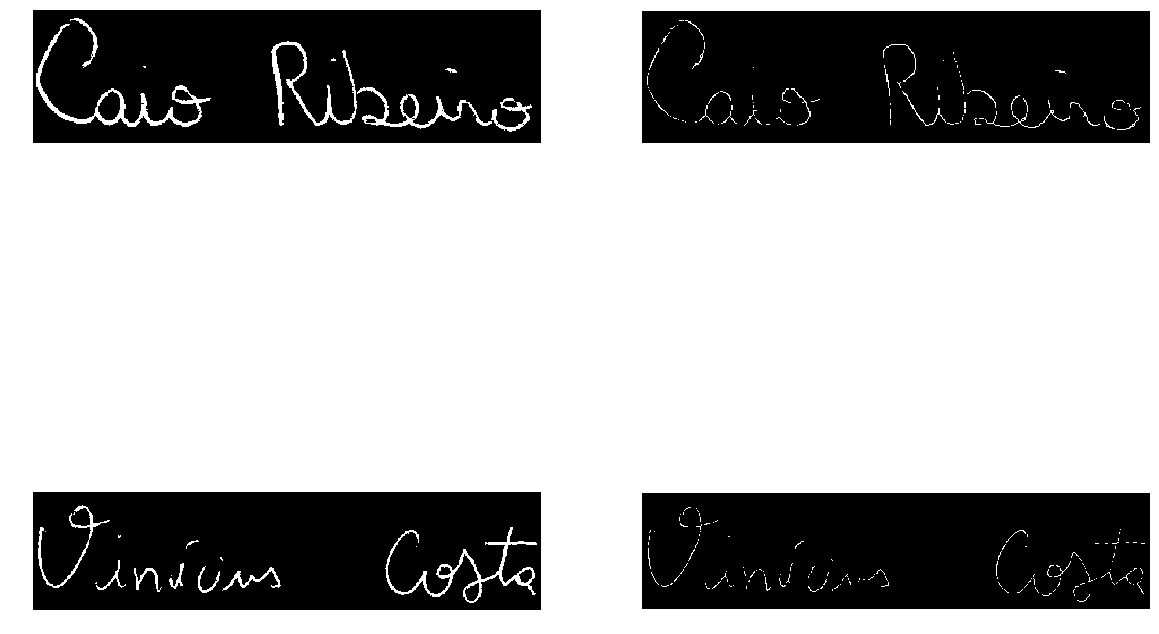

In [7]:
ThinImage1 = thinning(BinImage1)
ThinImage1 = (np.equal(ThinImage1, 1) * 255).astype(np.uint8)

ThinImage2 = thinning(BinImage2)
ThinImage2 = (np.equal(ThinImage2, 1) * 255).astype(np.uint8)

plt.figure(figsize=(20,16))
plt.subplot(221)
plt.imshow(BinImage1, cmap='gray')
plt.axis('off')

plt.subplot(222)
plt.imshow(ThinImage1, cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.imshow(BinImage2, cmap='gray')
plt.axis('off')

plt.subplot(224)
plt.imshow(ThinImage2, cmap='gray')
plt.axis('off')